In [202]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [203]:
# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Read the dataset
leads = pd.read_csv('Leads.csv')

In [206]:
# Look at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [207]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [208]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [209]:
# Check the summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [210]:
leads.describe(include=np.object)

AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

**General Guideline for Treating Missing Value**

- Identify if Missing are Numerical or Categorical values.
- Check for % of missing value of a column, if more than 30% of data missing drop the column.

**For Numerical Values**:

    a. Impute with Mean, Median or constant values.
    b. Logical condition Imputation.
    c. Interpolation and Regression Approach

**For Categorical Values**

    a. Impute with Mode values
    b. Logical condition Imputation.

# Assignment is to write down Strategy for:

1.   Handling Missing Values
2.   Handling Categorical Values



## Step 1: Data Cleaning and Preparation

In [211]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [212]:
# Check the number of missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [213]:
# Check the number of missing values in each column

leads.isnull().sum()/len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

As you can see there are a lot of columnw which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [214]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, axis = 1, inplace=True)

In [215]:
def drop_missing_columns(df,threshold):
    '''
    This function drop the columns from dataframe having missing values greater than a certain
    threshold value.
    Input:
      df : Dataframe from which you want to drop columns.
      threshold : Threshold integer value beyond which we will drop columns.
    Return: Dataframe with missing columns removed.
    '''
    for col in df.columns:
      if df[col].isnull().sum() > threshold:
          df.drop(col, axis = 1, inplace=True)
    return df

In [216]:
new_df = pd.read_csv('Leads.csv')
print(f"data shape before dropping columns {new_df.shape}")
drop_missing_columns(new_df,3000)
print(f"data shape after dropping columns {new_df.shape}")

data shape before dropping columns (9240, 37)
data shape after dropping columns (9240, 31)


In [217]:
leads.shape

(9240, 31)

In [218]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**City Column**

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [219]:
leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [220]:
city_mapper = {"Mumbai" : "Maharastra",
               "Thane & Outskirts" :"Maharastra",
               "Other Cities of Maharashtra" : "Maharastra",
               "Select" : "unknown",
               np.nan : "unknown",
               "Other Metro Cities" : "Others",
               "Other Cities" : "Others",
               "Tier II Cities" : "Others"
}

In [221]:
leads['State'] = leads['City'].replace(city_mapper,regex=True)

In [222]:
leads['State'].unique()

array(['unknown', 'Maharastra', 'Others'], dtype=object)

In [223]:
leads.drop(['City'], axis = 1, inplace = True)

In [224]:
leads['State'].isnull().sum()

0

**Country Column**

In [225]:
leads['Country'].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

In [226]:
leads['Country_modified'] = leads['Country'].apply(lambda x: "Others"  if x != "India" else "India")

In [227]:
leads['Country_modified'].unique()

array(['Others', 'India'], dtype=object)

In [228]:
# Same goes for the variable 'Country'

leads.drop(['Country'], axis = 1, inplace = True)

In [229]:
# Let's now check the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [230]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


The following three columns now have the level 'Select'. Let's check them once again.

**Lead Profile**

In [231]:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

**How did you hear about X Education**

In [232]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

**Specialization**

In [233]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [234]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [235]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

**What matters most to you in choosing a course**

In [236]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [237]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [238]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
State                                        0
Country_modified                             0
dtype: int64

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [239]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [240]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [241]:
# Check the number of null values again
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
State                                       0
Country_modified                            0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [242]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [243]:
# Check the null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
State                                      0
Country_modified                           0
dtype: int64

In [244]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [245]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
State                                      0
Country_modified                           0
dtype: int64

In [246]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [247]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
State                                     0
Country_modified                          0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [248]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [249]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,unknown,Others
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,unknown,India
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,Maharastra,India
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,Maharastra,India
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,Maharastra,India


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [250]:
leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [251]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,State,Country_modified
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,unknown,Others
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,unknown,India
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,Maharastra,India
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,Maharastra,India
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,Maharastra,India


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [252]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'State', 'Country_modified'],
      dtype='object')

In [253]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [254]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis = 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [255]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'],axis =  1)

In [256]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,State,Country_modified,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,unknown,Others,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,unknown,India,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,Maharastra,India,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,Maharastra,India,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,Maharastra,India,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [257]:
leads.drop(['State',"Country_modified"],axis=1,inplace=True)

In [258]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [259]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   bool   
 5   Lead Origin_Lead Add Form                             6373 non-null   bool   
 6   Lead Origin_Lead Import                               6373 non-null   bool   
 7   Lead Source_Direct Traffic                            6373 non-null   bool   
 8   Lead Source_Facebook                                  6373 non-

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [260]:
# Import the required library

from sklearn.model_selection import train_test_split

In [261]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [262]:
# Put the target variable in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [263]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [264]:
X_train.shape, y_train.shape

((4461, 74), (4461,))

In [265]:
 X_test.shape, y_test.shape

((1912, 74), (1912,))

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [266]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [267]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [268]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

# Benchmark Evaluation

In [269]:
# Import 'LogisticRegression' and create a LogisticRegression object

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
model = LogisticRegression()

In [272]:
model.fit(X_train,y_train)

LogisticRegression()

In [273]:
y_train.head(3)

8003    0
218     0
4171    1
Name: Converted, dtype: int64

In [274]:
X_train.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [275]:
model.predict_proba(X_train)
# [probability_of_not_getting_converted, probability_of_getting_converted]
                            #  0.5 , 0.2
# [0.71165548, 0.28834452], ==> 0  , 1
# [0.92032307, 0.07967693], ==> 0  , 0
# [0.94723522, 0.05276478], ==> 0  , 0
# [0.10182112, 0.89817888], ==> 1  , 1
# [0,1]

array([[0.71165548, 0.28834452],
       [0.92032307, 0.07967693],
       [0.94723522, 0.05276478],
       ...,
       [0.10182112, 0.89817888],
       [0.88748822, 0.11251178],
       [0.5474528 , 0.4525472 ]])

In [276]:
model.predict(X_train) # threshold = 0.5

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

**Explain Confusion Matrix and associated metrics in a simple way. Let's break it down step by step!**

**Confusion Matrix:**

Imagine you have a super smart robot that can tell if an animal is a dog or a cat. Sometimes, the robot might make mistakes and say a dog is a cat, or a cat is a dog. The Confusion Matrix is like a chart that helps us see how good the robot is at recognizing animals.

Now, let's talk about the different parts of the Confusion Matrix.

1. True Positives (TP): These are the times when the robot correctly says an animal is a dog, and it really is a dog.

2. True Negatives (TN): These are the times when the robot correctly says an animal is a cat, and it really is a cat.

3. False Positives (FP): These are the times when the robot mistakenly says an animal is a dog, but it's actually a cat.

4. False Negatives (FN): These are the times when the robot mistakenly says an animal is a cat, but it's actually a dog.

Metrics from the Confusion Matrix:

We use these parts of the Confusion Matrix to find out how well the robot is doing. Let's look at some important things we can figure out:

a. Accuracy: This tells us how many times the robot got things right. It's like the percentage of animals the robot guessed correctly out of all the animals.

b. Precision: This helps us see how good the robot is at saying something is a dog, and it really is a dog. It's like the percentage of times the robot was right when it said "dog."

c. Recall: This helps us see how many of the actual dogs the robot was able to find. It's like the percentage of dogs the robot was able to catch.

d. F1-Score: This combines both Precision and Recall to give us a better idea of how well the robot is doing overall.

Python Code Example:

Here's a simple Python code example that shows how to calculate these metrics using some pretend data:

```
# Pretend Confusion Matrix
true_positives = 45
true_negatives = 80
false_positives = 5
false_negatives = 10

# Calculate metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
```
In this code, we calculate the metrics using the numbers of true positives, true negatives, false positives, and false negatives. These metrics help us understand how well the robot is performing in recognizing animals.

So, the Confusion Matrix and its metrics help us see how good our robot is at telling dogs from cats, and these numbers can help us make the robot even smarter!



In [277]:
# Pretend Confusion Matrix
# No. of Animals in total 140
# No. of Dogs were 45+5 = 50
# No. of Cats were 80+10  = 90

true_positives = 45
true_negatives = 80
false_positives = 5
false_negatives = 10

# Calculate metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives) # 43+80 /140
precision = true_positives / (true_positives + false_positives) # 45/50
recall = true_positives / (true_positives + false_negatives) # 45/45+10
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8928571428571429
Precision: 0.9
Recall: 0.8181818181818182
F1-Score: 0.8571428571428572


## Train

In [278]:
y_train_pred = model.predict(X_train)

In [279]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[1938,  374],
       [ 516, 1633]], dtype=int64)

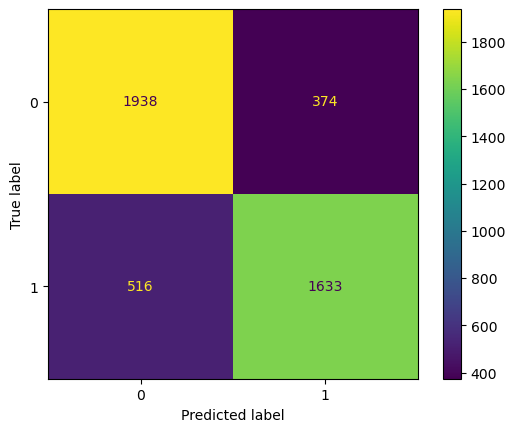

In [280]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

In [281]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score, roc_auc_score
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred))
print("Precision Score : ",precision_score(y_train,y_train_pred))
print("Recall Score : ",recall_score(y_train,y_train_pred))
print("F1 Score : ",f1_score(y_train,y_train_pred))

Accuracy Score :  0.8004931629679444
Precision Score :  0.8136522172396612
Recall Score :  0.7598883201489065
F1 Score :  0.785851780558229


In [282]:
# class 0 (Not Converted)is negative
# class 1 (COnverted)  is positive

# TP = 1633
# TN = 1938
# FP = 374
# FN = 516

In [283]:
# Accuracy =  TP+TN / (TP+TN+FP+FN) = 80.00 %
# Precision = TP / TP+ FP =81.36%
# Recall = TP / TP+FN = 75.98%
# F1-score = 2* recall*precision / recall + precision = 78.58%

## Test

In [284]:
y_test_pred = model.predict(X_test)

In [285]:
confusion_matrix(y_test,y_test_pred)

array([[139, 857],
       [ 47, 869]], dtype=int64)

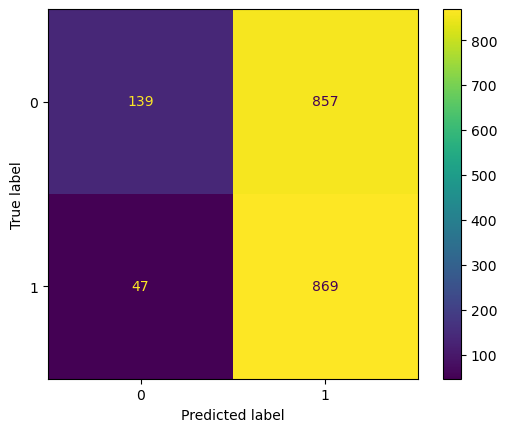

In [286]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [287]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

Accuracy Score :  0.5271966527196653
Precision Score :  0.503476245654693
Recall Score :  0.9486899563318777
F1 Score :  0.6578349735049205


## ROC Curve and AUC Score

I'd be happy to explain ROC curve, AUC curve, and associated metrics in a simple way. Let's take it step by step!

ROC Curve:

Imagine you have a magical detector that can decide if someone is a superhero or not. Sometimes, it might say a normal person is a superhero, or it might miss some real superheroes. The ROC curve is like a graph that helps us see how good the detector is at finding superheroes.

Now, let's talk about the parts of the ROC curve:

True Positive Rate (TPR): This is how many real superheroes the detector correctly spots. It's like the percentage of real superheroes it finds.

False Positive Rate (FPR): This is how many regular people the detector wrongly thinks are superheroes. It's like the percentage of normal people the detector mistakenly calls superheroes.

AUC Curve:

The AUC curve is like a special measurement that helps us compare different magical detectors. It's like looking at how well different detectors work at finding superheroes. The AUC value tells us how much area is under the ROC curve.

Metrics from the ROC Curve and AUC:

From the ROC curve and AUC value, we can learn a few important things:

AUC Value: If the AUC value is close to 1, it means the detector is doing an amazing job. If it's closer to 0.5, it means the detector is just guessing and not doing much better than chance.

Best Point: We can find a special point on the ROC curve where the TPR is high, and the FPR is low. This is where the detector is really good at finding superheroes without calling too many regular people superheroes.

Python Code Example:

Here's a simple Python code example that shows how to create an ROC curve and calculate the AUC value using some pretend data:

```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Pretend data
true_labels = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
predicted_probs = np.array([0.1, 0.3, 0.6, 0.8, 0.2, 0.7, 0.4, 0.9, 0.75, 0.3])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC Value:", roc_auc)
```
In this code, we generate a pretend dataset with true labels and predicted probabilities. We calculate the ROC curve and AUC value using the roc_curve and auc functions from the sklearn.metrics module. The ROC curve shows how well the magical detector is performing, and the AUC value gives us a number to compare different detectors.

So, the ROC curve, AUC curve, and associated metrics help us understand how well our magical superhero detector is working and how different detectors compare to each other!


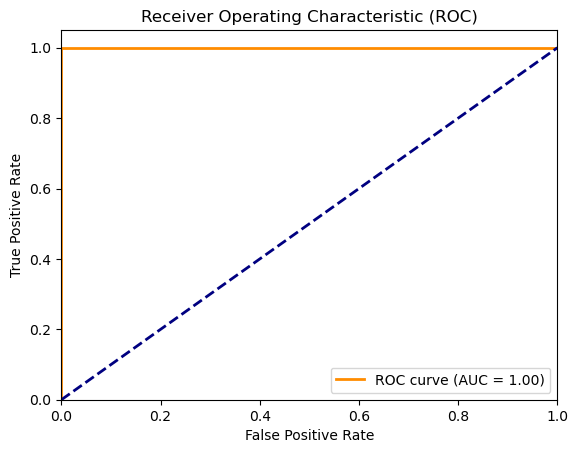

AUC Value: 1.0


In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Pretend data
true_labels = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])
predicted_probs = np.array([0.1, 0.3, 0.6, 0.8, 0.2, 0.7, 0.4, 0.9, 0.75, 0.3])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("AUC Value:", roc_auc)


## ROC function

In [289]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [290]:
actual = y_train
probs = model.predict_proba(X_train)[:,1]

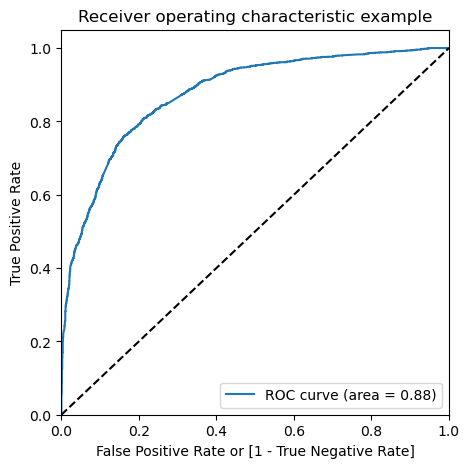

In [291]:
draw_roc(actual,probs)

In [292]:
actual = y_test
probs = model.predict_proba(X_test)[:,1]

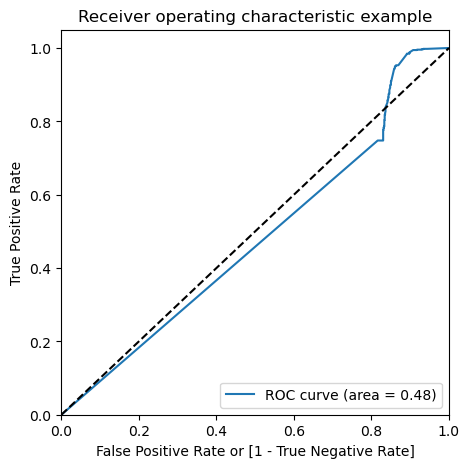

In [293]:
draw_roc(actual,probs)


## Generating scrore between 0-100 for potential lead

In [294]:
estimated_probability = model.predict_proba(X_train)[0]
estimated_probability

array([0.71165548, 0.28834452])

In [295]:
# P(positive_class) + P(negative_class) = 1

In [296]:
estimated_probability[0]  + estimated_probability[1]

1.0

In [297]:
# estimated probability of a class being negative
negative_class  = estimated_probability[0] # probability of negative class
negative_class
# if probability is greater than 0.5 then class is negative if tless than that it is positive.

0.7116554814038056

In [298]:
# P(positive_class) = 1 - P(negative_class)

In [299]:
# estimated probability of a class being positive
positive_class = estimated_probability[1] # probability of positive class
positive_class
# if probability is greater than 0.5 then class is positive  and if less than that it is negative.

0.2883445185961943

In [300]:
# We have a focus on estmated probability of getting conversion.
estimated_probabilty = model.predict_proba(X_train)

In [301]:
predicted_value = model.predict(X_train)

In [302]:
coversion_df = pd.DataFrame([estimated_probabilty[:,1],predicted_value ]).T

In [303]:
coversion_df

,0,1
0,0.288345,0.0
1,0.079677,0.0
2,0.052765,0.0
3,0.346328,0.0
4,0.971423,1.0
...,...,...
4456,0.939408,1.0
4457,0.559800,1.0
4458,0.898179,1.0
4459,0.112512,0.0


In [304]:
coversion_df.columns = ['estimated_probability','predicted_value']

In [305]:
coversion_df['predicted_value'] = coversion_df['predicted_value'].astype('int')

In [306]:
coversion_df['Score'] = round(coversion_df['estimated_probability']*100,2)

In [307]:
coversion_df

,estimated_probability,predicted_value,Score
0,0.288345,0,28.83
1,0.079677,0,7.97
2,0.052765,0,5.28
3,0.346328,0,34.63
4,0.971423,1,97.14
...,...,...,...
4456,0.939408,1,93.94
4457,0.559800,1,55.98
4458,0.898179,1,89.82
4459,0.112512,0,11.25


# **Change Threshold**

In [308]:
# threshold 0.5
predicted_value_05 = model.predict(X_train)

In [309]:
print("Accuracy Score : ",accuracy_score(y_train,predicted_value_05))
print("Precision Score : ",precision_score(y_train,predicted_value_05))
print("Recall Score : ",recall_score(y_train,predicted_value_05))
print("F1 Score : ",f1_score(y_train,predicted_value_05))

Accuracy Score :  0.8004931629679444
Precision Score :  0.8136522172396612
Recall Score :  0.7598883201489065
F1 Score :  0.785851780558229


In [310]:
estimated_probabilty = model.predict_proba(X_train)
estimated_positive_probabilty = estimated_probabilty[:,1]
estimated_positive_probabilty

array([0.28834452, 0.07967693, 0.05276478, ..., 0.89817888, 0.11251178,
       0.4525472 ])

In [311]:
threshold_df = pd.DataFrame([estimated_positive_probabilty,predicted_value_05]).T
threshold_df.columns=['positive_probabilty','predicted_value_05']

In [312]:
threshold_df

,positive_probabilty,predicted_value_05
0,0.288345,0.0
1,0.079677,0.0
2,0.052765,0.0
3,0.346328,0.0
4,0.971423,1.0
...,...,...
4456,0.939408,1.0
4457,0.559800,1.0
4458,0.898179,1.0
4459,0.112512,0.0


In [313]:
thres_list = [1,2,3,4,5,6,7,8,9]
for thres in thres_list:
  threshold_df['predicted_value_0'+str(thres)] = threshold_df['positive_probabilty'].apply(lambda x: 1 if x > (thres/10) else 0)

In [314]:
threshold_df

,positive_probabilty,predicted_value_05,predicted_value_01,predicted_value_02,predicted_value_03,predicted_value_04,predicted_value_06,predicted_value_07,predicted_value_08,predicted_value_09
0,0.288345,0,1,1,0,0,0,0,0,0
1,0.079677,0,0,0,0,0,0,0,0,0
2,0.052765,0,0,0,0,0,0,0,0,0
3,0.346328,0,1,1,1,0,0,0,0,0
4,0.971423,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4456,0.939408,1,1,1,1,1,1,1,1,1
4457,0.559800,1,1,1,1,1,0,0,0,0
4458,0.898179,1,1,1,1,1,1,1,1,0
4459,0.112512,0,1,0,0,0,0,0,0,0


In [315]:
thres_list = [1,2,3,4,5,6,7,8,9]
for thres in thres_list:
  print("Score for threshold value: ",str(thres/10))
  print("Accuracy Score : ",accuracy_score(y_train,threshold_df['predicted_value_0'+str(thres)]))
  print("Precision Score : ",precision_score(y_train,threshold_df['predicted_value_0'+str(thres)]))
  print("Recall Score : ",recall_score(y_train,threshold_df['predicted_value_0'+str(thres)]))
  print("F1 Score : ",f1_score(y_train,threshold_df['predicted_value_0'+str(thres)]))
  print("\n")

Score for threshold value:  0.1
Accuracy Score :  0.5696032279757902
Precision Score :  0.5285180572851805
Recall Score :  0.9874360167519777
F1 Score :  0.6885139519792343


Score for threshold value:  0.2
Accuracy Score :  0.7126204886796682
Precision Score :  0.634085988246211
Recall Score :  0.9539320614239181
F1 Score :  0.7617985878855443


Score for threshold value:  0.3
Accuracy Score :  0.7700067249495629
Precision Score :  0.7045537340619308
Recall Score :  0.899953466728711
F1 Score :  0.7903555373927258


Score for threshold value:  0.4
Accuracy Score :  0.7926473884779197
Precision Score :  0.7651646447140381
Recall Score :  0.8217775709632387
F1 Score :  0.7924612968364371


Score for threshold value:  0.5
Accuracy Score :  0.8004931629679444
Precision Score :  0.8136522172396612
Recall Score :  0.7598883201489065
F1 Score :  0.785851780558229


Score for threshold value:  0.6
Accuracy Score :  0.777404169468729
Precision Score :  0.8498789346246973
Recall Score :  0.6533

## Improving Model performance.

In [316]:
# Select more appropiate features and removing any correlated features.

In [317]:
# Import RFE and select 15 variables
# Recursive feature Elimination ,technique for doing feature selection.

from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=15, step=1)   # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [318]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [319]:
rfe.ranking_

array([ 1,  1, 23,  8,  1, 52, 24, 51, 36, 44,  1, 35, 43, 53,  1, 37, 58,
       42,  1, 33, 38,  1, 25,  4, 49, 57, 41, 54, 28,  1,  5, 26,  1, 47,
       40, 34, 48,  1, 46,  1,  1,  1, 50,  3, 20, 59, 27, 60,  1,  2, 32,
       31, 45,  1, 39, 29,  6, 15, 11,  9, 14, 10, 55, 16, 18, 22, 12, 21,
       19, 30,  7, 56, 13, 17])

In [320]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [321]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [322]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [323]:
# Select only the columns selected by RFE

X_train_new = X_train[col]

In [324]:
X_train_new

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,False,False,False,False,False,False,True,False,False,True,False,False,False
218,0.015936,0.082306,False,False,False,False,False,False,False,False,False,True,False,False,False
4171,0.023904,0.034331,False,False,False,False,False,False,False,False,False,True,False,False,False
4037,0.000000,0.000000,False,True,False,False,False,False,False,False,False,True,False,False,False
3660,0.000000,0.000000,True,False,True,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,True,False,True,False,False,False,True,False,False,True,False,False,False
100,0.027888,0.718750,False,False,False,False,False,False,False,False,False,True,False,False,False
5877,0.011952,0.752201,False,False,False,False,False,False,True,False,False,True,False,False,False
8658,0.015936,0.187060,False,False,False,False,False,False,False,False,False,True,False,False,False


In [325]:
# Import statsmodels

import statsmodels.api as sm

In [326]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Lead Origin_Lead Add Form` since it has a high p-value as well as a high VIF.

In [ ]:
X_train_new.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Last Notable Activity_Had a Phone Conversation`.

In [ ]:
X_train_new.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit().summary()

Drop `What is your current occupation_Housewife`.

In [327]:
X_train_new.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [328]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit().summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Drop `What is your current occupation_Working Professional`.

In [329]:
X_train_new.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [330]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [331]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Step 3: Model Evaluation
​
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [332]:
final_col = X_train_new.columns

In [333]:
X_test_new = X_test[final_col]

In [334]:
X_test_new

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.0,0,True,False,True,False,False,False,True,False,False,False,False
6122,7.0,66,False,False,False,False,False,False,False,False,True,False,False
9202,4.0,947,False,False,False,False,False,False,True,False,True,False,False
6570,3.0,861,False,False,False,False,True,False,True,False,True,False,False
2668,8.0,898,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,3.0,62,False,False,False,False,False,False,True,False,True,False,False
6583,3.0,346,False,False,False,False,False,False,True,False,True,False,False
5531,14.0,1595,False,False,False,False,False,False,False,False,True,False,False
3056,3.0,949,False,False,False,False,True,False,True,False,True,False,False


## Building New model after doing feature selection and removing highly correlated values and statistically insignificant feature.

In [335]:
model_new = LogisticRegression()
model_new.fit(X_train_new,y_train)

LogisticRegression()

In [336]:
model_new.predict(X_train_new)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [337]:
model_new.predict_proba(X_train_new)[:,1]

array([0.31469358, 0.15385174, 0.13092222, ..., 0.90645371, 0.2206909 ,
       0.38303459])

## Train and Test evaluation on new model.

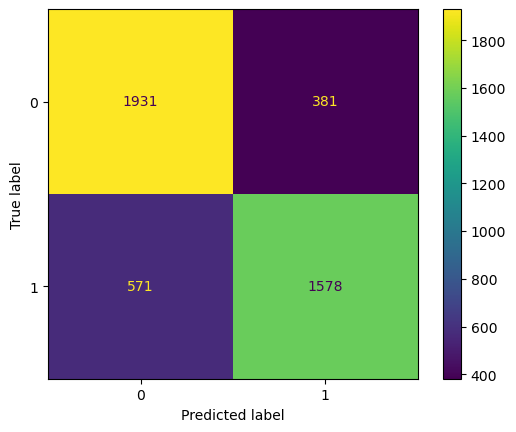

In [338]:
y_train
y_train_pred = model_new.predict(X_train_new)
confusion_matrix(y_train,y_train_pred)
ConfusionMatrixDisplay.from_estimator(model_new, X_train_new, y_train)

In [339]:
print("Accuracy Score : ",accuracy_score(y_train,y_train_pred))
print("Precision Score : ",precision_score(y_train,y_train_pred))
print("Recall Score : ",recall_score(y_train,y_train_pred))
print("F1 Score : ",f1_score(y_train,y_train_pred))


Accuracy Score :  0.7865949338713293
Precision Score :  0.8055130168453293
Recall Score :  0.7342950209399721
F1 Score :  0.7682570593963


In [340]:
roc_auc_score(y_train,model_new.predict_proba(X_train_new)[:,1])

0.8597819900138634

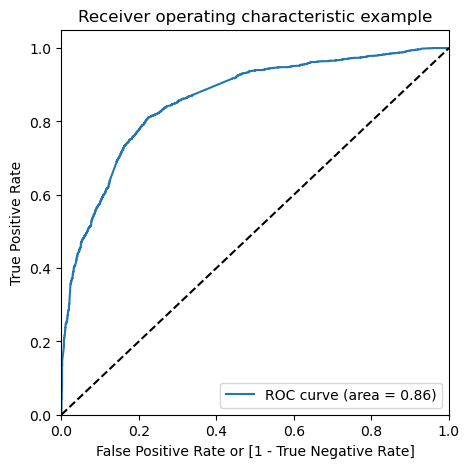

In [341]:
draw_roc(y_train, model_new.predict_proba(X_train_new)[:,1])

## Test

In [342]:
y_test

4771    1
6122    0
9202    0
6570    1
2668    1
       ..
5828    0
6583    1
5531    0
3056    1
4088    1
Name: Converted, Length: 1912, dtype: int64

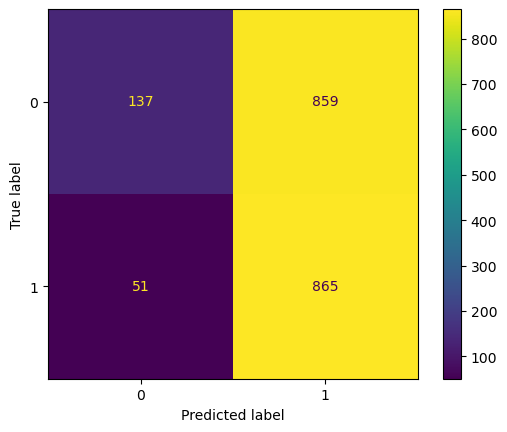

In [343]:
y_test_pred = model_new.predict(X_test_new)
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(model_new, X_test_new, y_test)

In [344]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

Accuracy Score :  0.5240585774058577
Precision Score :  0.5017401392111369
Recall Score :  0.9443231441048034
F1 Score :  0.6553030303030303


In [345]:
roc_auc_score(y_test,model_new.predict_proba(X_test_new)[:,1])

0.47645494642324754

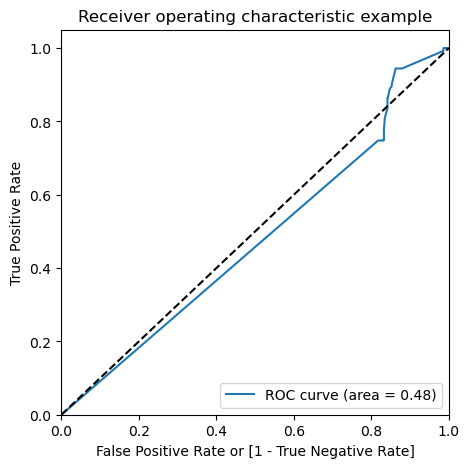

In [346]:
roc_auc_score(y_test,model_new.predict_proba(X_test_new)[:,1])
draw_roc(y_test,model_new.predict_proba(X_test_new)[:,1])

## Changing Hyperparameters of the logistic Regression Model.

In [347]:
from sklearn.linear_model import LogisticRegression

In [348]:
logistic_model = LogisticRegression(penalty='elasticnet', tol=0.00001 , C=100.0, solver='saga', max_iter=10000, l1_ratio=0.70)

In [349]:
logistic_model.fit(X_train_new,y_train)

LogisticRegression(C=100.0, l1_ratio=0.7, max_iter=10000, penalty='elasticnet',
                   solver='saga', tol=1e-05)

In [350]:
roc_auc_score(y_test,logistic_model.predict_proba(X_test_new)[:,1])

0.4721352659546483

# **K-Nearest Neighbours**

In [351]:
from sklearn.neighbors import KNeighborsClassifier

In [352]:
nn_model = KNeighborsClassifier()

In [355]:
nn_model.fit(X_train_new,y_train)

KNeighborsClassifier()

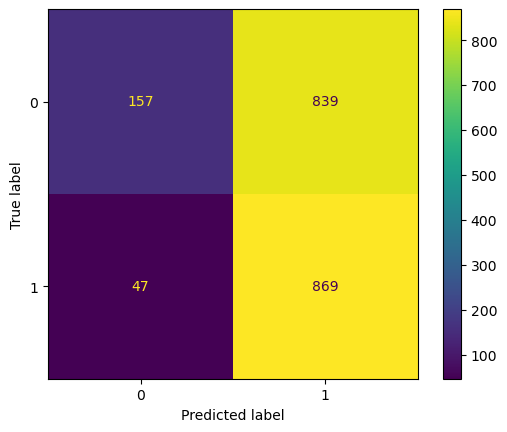

In [356]:
y_test_pred = nn_model.predict(X_test_new)
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(nn_model, X_test_new, y_test)

In [357]:
accuracy_score(y_test,y_test_pred)

0.5366108786610879

In [358]:
precision_score(y_test,y_test_pred)

0.5087822014051522

In [359]:
recall_score(y_test,y_test_pred)

0.9486899563318777

In [360]:
f1_score(y_test,y_test_pred)

0.6623475609756098

In [361]:
roc_auc_score(y_test,nn_model.predict_proba(X_test_new)[:,1])

0.7617692385261571

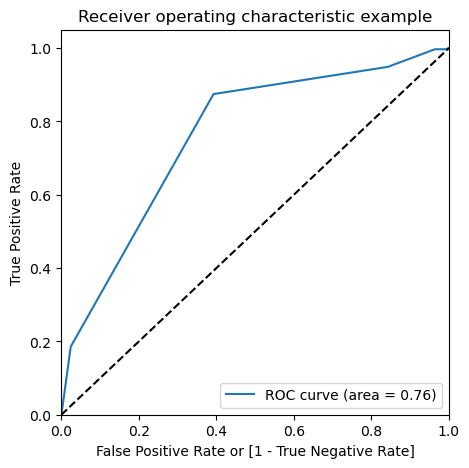

In [362]:
draw_roc(y_test,nn_model.predict_proba(X_test_new)[:,1])

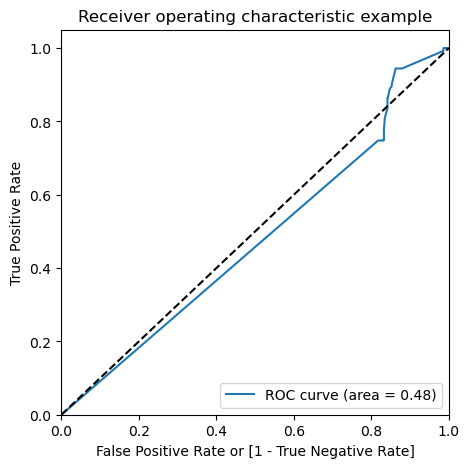

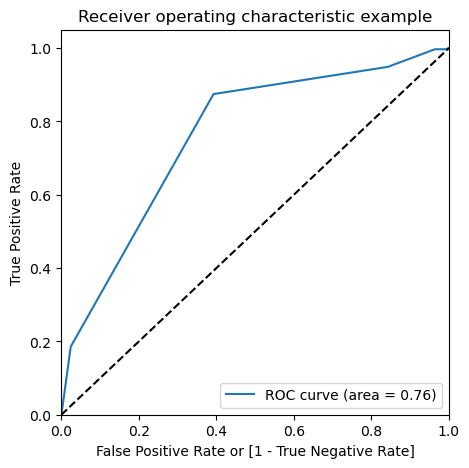

In [363]:
draw_roc(y_test,model_new.predict_proba(X_test_new)[:,1])
draw_roc(y_test,nn_model.predict_proba(X_test_new)[:,1])

# **Random Forest**

In [364]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with 100 trees
n_trees = 100
random_forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train_new, y_train)

y_test_pred = random_forest.predict(X_test_new)

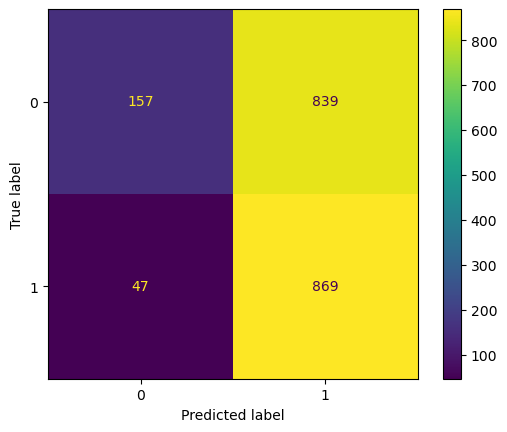

In [365]:
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(nn_model, X_test_new, y_test)

In [366]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

Accuracy Score :  0.7086820083682008
Precision Score :  0.7060849598163031
Recall Score :  0.6713973799126638
F1 Score :  0.6883044208170118


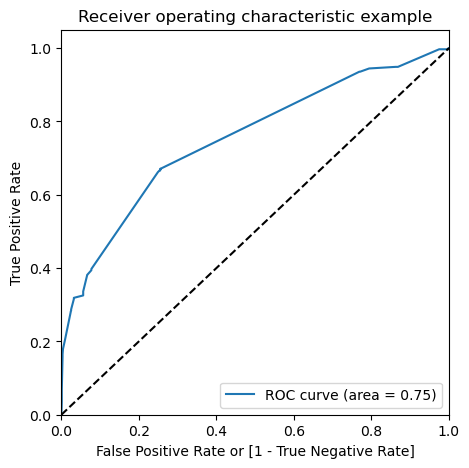

In [367]:
roc_auc_score(y_test,random_forest.predict_proba(X_test_new)[:,1])
draw_roc(y_test,random_forest.predict_proba(X_test_new)[:,1])

# **XG Boost**

In [368]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train_new, y_train)
y_test_pred = xgb_classifier.predict(X_test_new)

AttributeError: module 'pandas' has no attribute 'Int64Index'

In [ ]:
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(nn_model, X_test_new, y_test)

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

In [369]:
roc_auc_score(y_test,xgb_classifier.predict_proba(X_test_new)[:,1])
draw_roc(y_test,xgb_classifier.predict_proba(X_test_new)[:,1])

NotFittedError: need to call fit or load_model beforehand

# **Light GBM**

In [370]:
! pip install lightgbm

In [371]:
import lightgbm as lgb

# Create a LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train_new, y_train)
y_test_pred = xgb_classifier.predict(X_test_new)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2149, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4461, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481731 -> initscore=-0.073110
[LightGBM] [Info] Start training from score -0.073110


NotFittedError: need to call fit or load_model beforehand

In [ ]:
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(nn_model, X_test_new, y_test)

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

In [ ]:
roc_auc_score(y_test,lgb_classifier.predict_proba(X_test_new)[:,1])
draw_roc(y_test,lgb_classifier.predict_proba(X_test_new)[:,1])

# **Cat Boost**

In [ ]:
! pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

# Create a CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42)

# Train the classifier
catboost_classifier.fit(X_train_new, y_train)
y_test_pred = xgb_classifier.predict(X_test_new)


In [ ]:
confusion_matrix(y_test,y_test_pred)
ConfusionMatrixDisplay.from_estimator(catboost_classifier, X_test_new, y_test)

In [ ]:
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred))
print("Precision Score : ",precision_score(y_test,y_test_pred))
print("Recall Score : ",recall_score(y_test,y_test_pred))
print("F1 Score : ",f1_score(y_test,y_test_pred))

In [ ]:
roc_auc_score(y_test,catboost_classifier.predict_proba(X_test_new)[:,1])
draw_roc(y_test,catboost_classifier.predict_proba(X_test_new)[:,1])